In [1]:
# necessary packages for the worksheet
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Problem 1

Given the minimization problem:
$$\min_{c \in R^2, r^2 \in R} \hspace{10mm}r^2$$
$$\text{s.t} \hspace{2mm}(c-x_i)^T . (c-x_i) \leq r^2 \hspace{10mm} \forall i \in {1,...,m}$$



This problem in standard form becomes:
$$\min_{c \in R^2, r^2 \in R} \hspace{10mm}r^2$$
$$\text{s.t} \hspace{5mm}r^2-(c-x_i)^T . (c-x_i)\geq 0 \hspace{10mm} \forall i \in {1,...,m}$$



**(1a)**

The **lagrange dual** to this problem is written below
$$\sup_{\lambda \in R} \hspace{5mm} \inf_{c \in R^2, r^2 \in R}\hspace{5mm} r^2 - \sum_{i=1}^m \lambda_i(r^2-(c-x_i)^T  (c-x_i))$$


**(1b)**

The **wolfe dual** of the problem is given as follows
$$\sup_{\bf{c} \in R^2, r^2 \in R, \lambda \in R}\hspace{5mm} r^2 - \sum_{i=1}^m \lambda_i(r^2-(c-x_i)^T  (c-x_i))$$
$$\text{s.t} \hspace{4mm} \lambda_i \geq 0$$
$$\nabla_{r,c}\hspace{1mm} (r^2) = \sum_{i=1}^m(\lambda_i) \nabla_{r,c}\hspace{2mm} (r^2-(c-x_i)^T  (c-x_i))$$

# Problem 3

Below is a function that we will use to plot the functions a,b and c problem 3

In [2]:
from typing import Callable
def plot(func: Callable, title: str, _range = None):
    
    if _range:
        x_range, y_range = _range[0], _range[1]
    else:
        x_range, y_range = -1.5, 1.5
    x = np.linspace(x_range , y_range, 1000)
    y = np.linspace(x_range, y_range, 1000)
    X, Y = np.meshgrid(x, y)
    try:
        Z = func(X, Y)
        
    except:
        Z = func(np.array([X,Y]))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis_r')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(x,y)')
    plt.title(title)
    plt.show()

### (3a)

$$\min_{(x,y) \in R^2} \frac{1}{100}(x^2+y^2) - \frac{1}{2}(cos(3x-3y)+cos(3x+3y))$$

**3a.1: Algorithms that can be applied**

The two algorithms from the lecture that can solve this are:
- Gradient descent
- Newton's method

**3a.2: Empirical Evaluation**



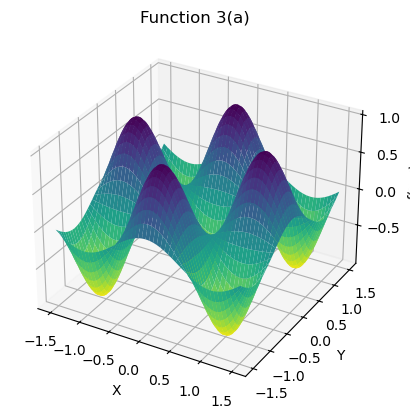

In [3]:
def f(x, y):
    a = x**2 + y**2
    b = np.cos(3*x-3*y)+np.cos(3*x+3*y)
    return (1/100)*a - (1/2)*b
def f_2(xy):
    x, y = xy[0], xy[1]
    a = x**2 + y**2
    b = np.cos(3*x-3*y)+np.cos(3*x+3*y)
    return (1/100)*a - (1/2)*b
plot(f, "Function 3(a)");

From the plot above, we see that there are a lot of local minima in this problem. This means that there is a good chance of getting stack in a local minima.

We first get the analytical solution in order to compare it to the empirical solution we shall get in this method.

we note that $$\nabla f(x,y) = \begin{bmatrix}\left(\frac{x}{50}+\frac{3}{2}\sin \left(3x-3y\right)+\frac{3}{2}\sin \left(3x+3y\right)\right)\\ \left(\frac{y}{50}-\frac{3}{2}\sin \left(3x-3y\right)+\frac{3}{2}\sin \left(3x+3y\right)\right)\end{bmatrix}$$

We see that when $(x,y) = (0,0)$, this gradient is equal to $0$.

To check if $x=0, y=0$ is a minimum, we shall check the hessian.
$$
\begin{pmatrix}
\frac{1}{2} \left( 9 \cos(3x - 3y) + 9 \cos(3x + 3y) \right) + \frac{1}{50} & \frac{1}{2} \left( 9 \cos(3x + 3y) - 9 \cos(3x - 3y) \right) \\
\frac{1}{2} \left( 9 \cos(3x + 3y) - 9 \cos(3x - 3y) \right) & \frac{1}{2} \left( 9 \cos(3x - 3y) + 9 \cos(3x + 3y) \right) + \frac{1}{50}
\end{pmatrix}
$$
Now, at $(0,0)$ this hessian matrix becomes:


$$H=
\begin{pmatrix}
\frac{226}{50} & 0 \\
0 & \frac{256}{50}
\end{pmatrix}
$$

since all diagonal entries of the hessian are positive, and the other parts of the hessian are all 0, then this matrix is positive semidefinite and we do not need to check for eigen values. 

Therefore, $(0,0)$ is the global minima.

In [4]:
def grad_f(xy):
    x, y = xy[0], xy[1]
    a = 3*x-3*y
    b = 3*x+3*y
    grad_x = x/50 + 3/2*np.sin(a)+3/2*np.sin(b)
    grad_y = y/50 - 3/2*np.sin(a) + 3/2*np.sin(b)
    return np.array([grad_x, grad_y])

initial_guess = np.array([3., 1])
result = minimize(f_2, initial_guess, jac=grad_f, method='BFGS')
print(f"The minimum point found is: {result.x}")
print(f"minimum valule found: {f(result.x[0], result.x[1])}")
print(f"The number of itirations are: {result.nit}")

The minimum point found is: [3.13462595 1.04487526]
minimum valule found: -0.8905808958159527
The number of itirations are: 6


**3a.3 Analysis of the empirical results for function a**

From the empirical results above, we see that the mimimum point found is very different from the actual global minimum.

This is not suprising because, just by looking at the plot of the function, there are many local minima and therefore, a gradient based optimization algorithm would be prone to getting stuck in a local minima.

**Problem 3b**



Given the problem: $$\min_{(x,y)\in R^2} (x-1)^2+100(x^2-y)^2$$


**3b.1: Some algorithms that can solve this**

The two algorithms that can be used to solve this problem include:
- Gradient descent
- Newton's method

**3b.2: Empirical evaluation**

Before we empirically evaluate this, we shall analytically evaluate this in order to compare the results from the empirical evaluation.

The setting the gradient of the function to $0$ we get:
$$\nabla_{x,y}f(x,y) = \begin{pmatrix}
2(x-1)+400x^3-400xy \\
-200(x^2-y)
\end{pmatrix} = \begin{pmatrix}
400x^3+2x-400xy-2 \\
200y-200x^2
\end{pmatrix}=\begin{pmatrix} 0 \\ 0 \end{pmatrix}$$
This works when $y=x^2$

Therefore, substituting $y$ in the first entry of the gradient vector, we get:
$$400x^3+2x-400xy-2= 400x^3+2x-400x^3-2=2x-2=0$$
$$ x=1$$

Therefore, the critical point is $(x,y) = (1,1)$

To check if this is a local minima, or maxima or saddle point, we shall check the eigen values of its hessian matrix as shown below:

$$H = \begin{pmatrix}
1200x^2 -400y+2 & -400x \\
-400x & 200
\end{pmatrix}
$$
At critical point $(1,1)$, we get: 
$$H = \begin{pmatrix}
802 & -400 \\
-400 & 200
\end{pmatrix}
$$

$$|H-\lambda I| = (802-\lambda)(200-\lambda)-400^2=0$$
$$\lambda_1=501 + \sqrt{250601}, \lambda_2 = 501 -\sqrt{250601}$$
Therefore, $\lambda_1 > 0, \lambda_2 > 0$, hence the point $(x,y)=(1,1)$ is a local minima.

Since there is only one critical point and the problem is unconstrained, then this is also the global minima.


In [5]:
def func_b(xy):
    x = xy[0]
    y = xy[1]
    return (x-1)**2 +100*(x**2-y)**2

def gradient_func_b(xy):
    x = xy[0]
    y = xy[1]
    grad_x = 400*x**3+2*x-400*x*y-2
    grad_y = 200*y - 200*x**2
    return np.array([grad_x, grad_y])
initial_guess = np.array([2.,3])

result = minimize(func_b, initial_guess, jac=gradient_func_b, method='BFGS')
print(f"GLobal minima found: {result.x}\n",
      f"Number of itirations: {result.nit}")
# print(result)

GLobal minima found: [0.99999997 0.99999993]
 Number of itirations: 22


**3b.3: Analysis of empirical results for function b**

After 22 itiration, the algorithm was able to find a global minima $(x,y) =(0.99999997, 0.99999993) \approx (1,1)$ to the nearest whole number.

This matches our analytical solution we got earlier. 

We quickly see how this algorithm is able to get to the grobal minimum without getting stuck in a minima by checking the objective function itself. The objective function is convex. We also see this in the plot below.

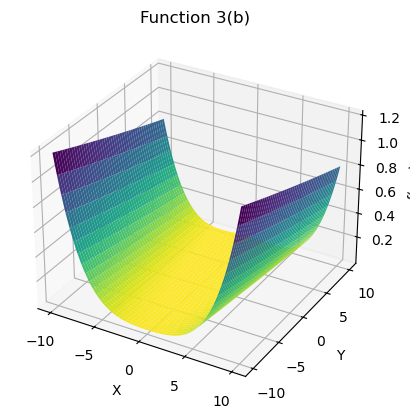

In [6]:
plot(func_b, "Function 3(b)", _range =[-10, 10])

**Problem 3c**

$$
\min_{(x,y)\in R^2} xy 
$$
$$
\text{s.t} \hspace{3mm} x^2+y^2 \leq 1 + \frac{1}{5}cos(8arctan(\frac{x}{y}))
$$

**3c.1: Algorithms that can solve this**
- Newton's method
- Gradient descent
- Trust region methods

**3c.2: Empirical Evaluation**

Before we do the empirical evaluation, we shall attempt to solve this problem analytically so as to compare the solution to the solution of the empirical solution.

We shall use polar coordinates in this problem.

$$
\text{Let} \hspace{3mm} (x,y) = (rsin(\theta), rcos(\theta))
$$
Then the minimization problem in standard form and using polar coordinates becomes:
$$
\min_{r, \theta}\hspace{3mm} r^2 sin(\theta) cos(\theta)
$$
$$\text{s.t.} \hspace{3mm} cos(8\theta)-5r^2+5 \geq0$$

From here, we note the following two things:
- From trigonometry, we know that the function $sin(\theta)cos(\theta)$ oscilates between $-0.5$ and $0.5$.
- For the values of $\theta$ where $sin(\theta)cos(\theta)=-0.5$, the value of $cos(8\theta)=1$.

Therefore, we can simplify the optimization problem as follows:
$$
\min_{r, \theta}\hspace{3mm} -0.5r^2
$$
$$\text{s.t.} \hspace{3mm} -5r^2+6 \geq0$$

Since $r^2 \geq 0$, then for the function to be minimal, the value of $r^2$ should be as large as possible. This is because the coefficient of the objective function is negative. 

By inspecting the constraint, we see that $r^2 \leq \frac{6}{5}$

Therefore, the largest value that $r^2$ can take is $\frac{6}{5}$

Hence 
$r=\sqrt{\frac{6}{5}}$ or $r=-\sqrt{\frac{6}{5}}$. 

This means that minimal value is:  $-0.5*\frac{6}{5}=-0.6$

Now having solved it analyrically, we will now solve it empirically.
In the codecells below, we first define the objective function, the constraint function, and then plot them. 

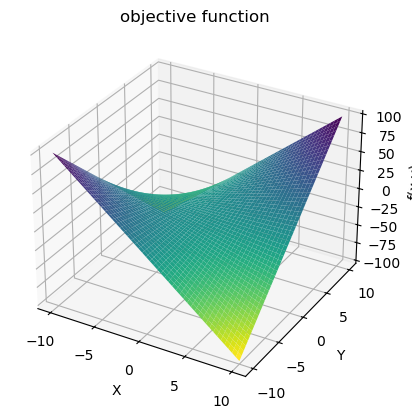

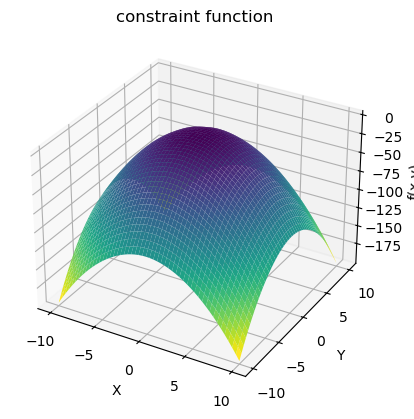

In [7]:
def obj(xs):
    """Objective function"""
    x, y = xs[0], xs[1]
    return x*y
def constraint(xs):
    """Constraint function"""
    x, y = xs[0], xs[1]
    return 1 + (1/5)*np.cos(8*np.arctan(x/y))-x**2-y**2
plot(obj, "objective function", _range =[-10, 10])
plot(constraint, "constraint function", _range = [-10,10]);

In [8]:
con = {'type': 'ineq', 'fun': constraint} 
result = minimize(obj, initial_guess, method='trust-constr', constraints=[con])
print(f"Minimal Point: {result.fun}\n",
      f"Number of iterations: {result.nit}")

Minimal Point: -0.5999999487999653
 Number of iterations: 30


**3c.3: Explaination of the empirical results**

From the print statement above, we observed the following:
- The value of the minimal point is $-0.5999999487999653$
- The true value obtained for the minimum of the function is $-0.6$ as shown analytically previously.
- These two values are very close together, in fact $-0.5999999487999653 \approx -0.6$ to one decimal place. This makes it a very good approximation
- Solving the problem analytically was very time consuming and the room for making errors was a lot. Therefore, solving it empirically is a very good approach.